In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor

In [24]:
# import the dataset

In [25]:
df = pd.read_csv('housing.csv')

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [26]:
# exploratory data analysis

In [27]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [28]:
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [29]:
df.shape

(20640, 10)

In [30]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


CHECK TOTAL EMPTY ROWS IN EACH COLUMN

In [32]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [33]:
# check distribution

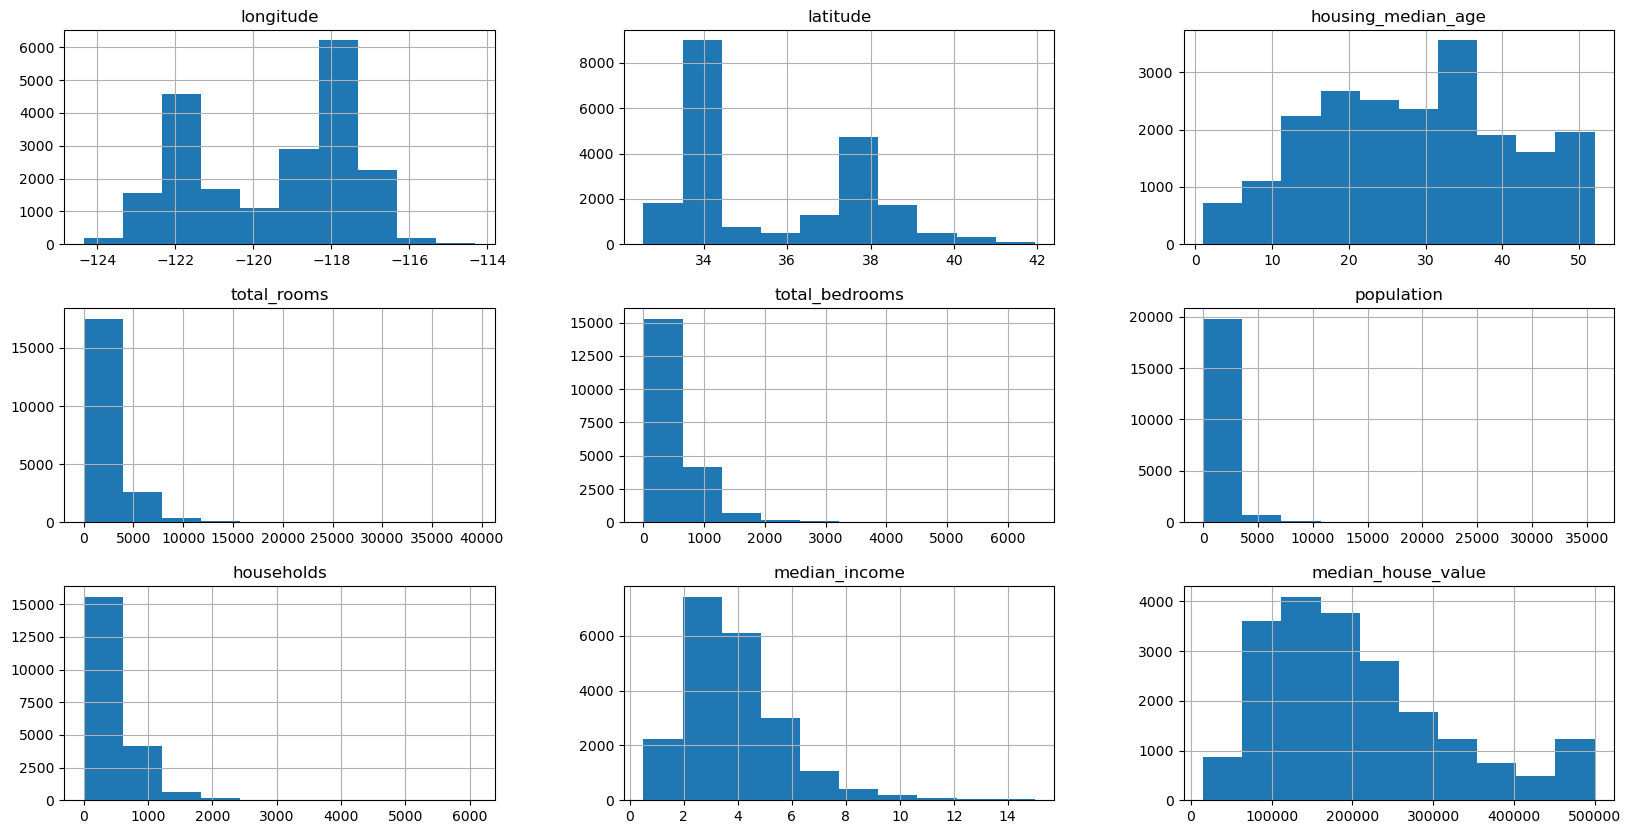

In [34]:
df.hist(figsize = (20,10))
plt.show()

CLEANING

In [35]:
# category to boolean
df = pd.get_dummies(df, columns = ["ocean_proximity"], drop_first = True)

DROP NAN VALUES

In [36]:
df = df.dropna(axis = 0)

DETERMINE CORRELATION

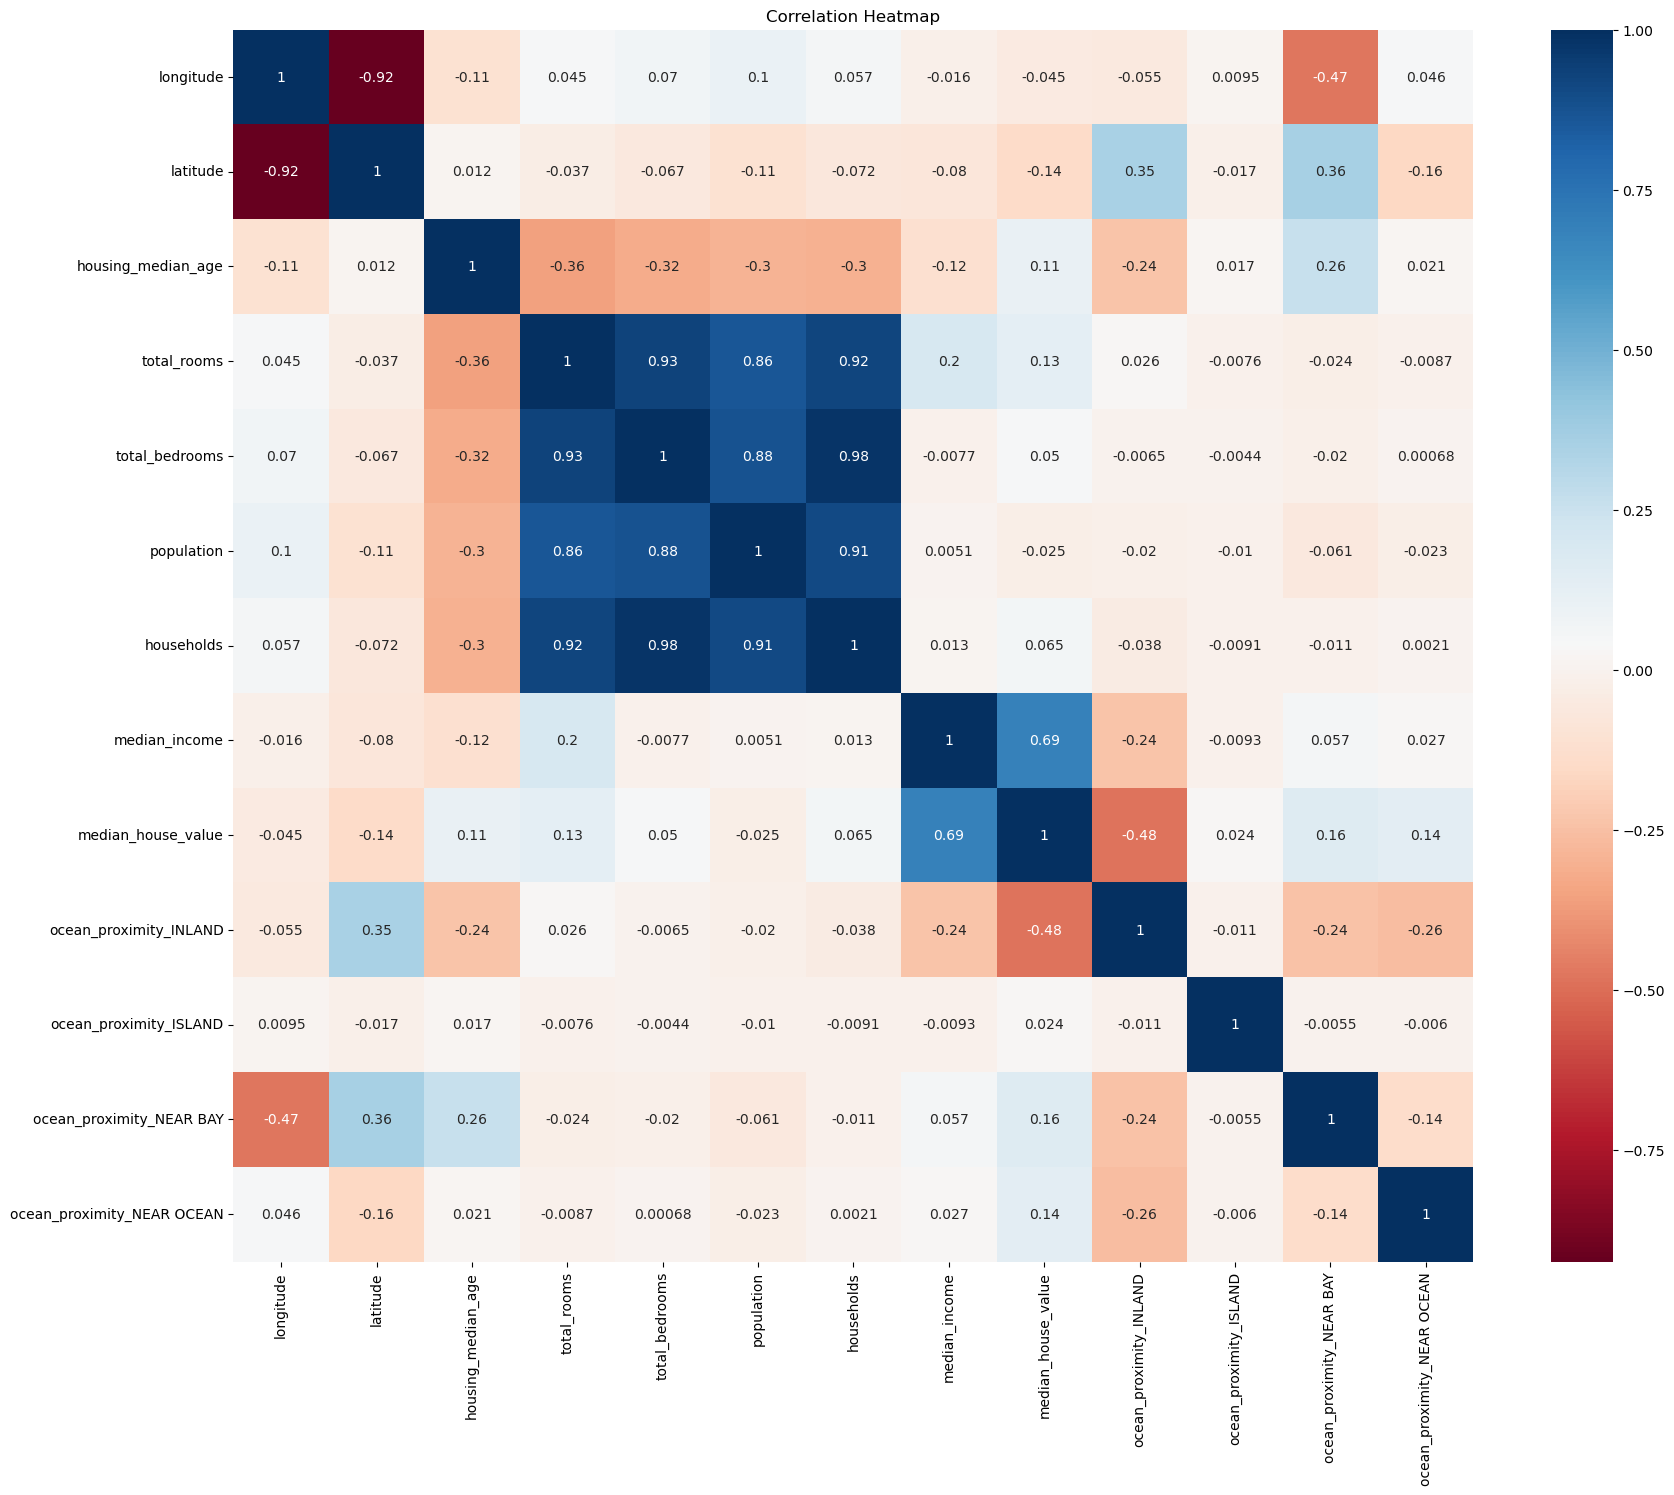

In [37]:
#df.corr()["median_house_value"].sort_values(ascending=True)
corr_matrix = df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

The target variable "median_house_value" shows a moderate negative correlation (-0.48) with "ocean_proximity_INLAND," suggesting that choosing houses farther from the ocean may not be favorable for obtaining high property values.

There is a somewhat strong positive correlation (0.69) between "median_house_value" and "median_income," indicating that considering the median income of residents in the area can be helpful in selecting valuable houses

REMOVE TARGET COLUMN FROM DATASET

In [38]:
y = df[["median_house_value"]]
X = df.drop(["median_house_value"], axis = 1)

SPLIT THE DATASET INTO TRAIN AND TEST SETS

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 123)

NORMALISATION

In [41]:
scale_x = MinMaxScaler()
scale_y = MinMaxScaler()

scale_x.fit(X_train)
X_train = scale_x.transform(X_train)
X_test = scale_x.transform(X_test)

scale_y.fit(y_train)
y_train = scale_y.transform(y_train)
y_test = scale_y.transform(y_test)


MODELS

In [45]:
# RANDOM FOREST REGRESSOR
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
prediction_random_forest = random_forest.predict(X_test)

mseRF = mean_squared_error(y_test, prediction_random_forest)
rmseRF = np.sqrt(mseRF)
r2RF = r2_score(y_test, prediction_random_forest)

print('Mean Squared Error:', mseRF)
print('Root Mean Squared Error:', rmseRF)
print('R-squared:', r2RF)

Mean Squared Error: 0.0101514135955828
Root Mean Squared Error: 0.1007542237108837
R-squared: 0.8156200543178305


The model's mean squared error (MSE) is 0.0102, indicating a low average prediction error for the given data. 
The root mean squared error (RMSE) is 0.1008, representing the average prediction error in the same units as the target variable. 
The R-squared value is 0.8156, indicating that the model explains approximately 81.56% of the variability in the data. Overall, the model performs well in predicting the target variable, with relatively low error and a high level of explained variability.

In [46]:
# LINEAR REGRESSION
regression = LinearRegression()
regression.fit(X_train, y_train)
prediction_regression = regression.predict(X_test)

mse = mean_squared_error(y_test, prediction_regression)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction_regression)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 0.019470008403941447
Root Mean Squared Error: 0.13953497197456072
R-squared: 0.6463665815456305


The model's mean squared error (MSE) is 0.0195, indicating a low average prediction error for the given data. 
The root mean squared error (RMSE) is 0.1395, representing the average prediction error in the same units as the target variable. 
The R-squared value is 0.6464, indicating that the model explains approximately 64.64% of the variability in the data. Overall, the model performs reasonably well in predicting the target variable, but there is still some unexplained variability.

In [47]:
# XGBoost
N_ESTIMATORS_XGB = 200 
xgboost = XGBRegressor( n_estimators = N_ESTIMATORS_XGB, seed = 123)
xgboost.fit(X_train, y_train)
prediction_xgboost = xgboost.predict(X_test)

XGmse = mean_squared_error(y_test, prediction_xgboost)
XGrmse = np.sqrt(XGmse)
XGr2 = r2_score(y_test, prediction_xgboost)

print('Mean Squared Error:', XGmse)
print('Root Mean Squared Error:', XGrmse)
print('R-squared:', XGr2)

Mean Squared Error: 0.009301079810314406
Root Mean Squared Error: 0.09644210600310638
R-squared: 0.8310646518276513


The model's mean squared error (MSE) is 0.0093, indicating a low average prediction error for the given data. The root mean squared error (RMSE) is 0.0964, representing the average prediction error in the same units as the target variable. The R-squared value is 0.8311, indicating that the model explains approximately 83.11% of the variability in the data. Overall, the model performs very well in predicting the target variable, with low error and a high level of explained variability.

In [52]:
# see real values 
prediction_xgboost_invers = scale_y.inverse_transform(np.reshape(prediction_xgboost,(-1,1)))
y_test_invers = scale_y.inverse_transform(np.reshape(y_test,(-1,1)))
print(f"XGBoost Prediction:\n {np.squeeze(prediction_xgboost_invers[0:2])}")
print(f"Real Values:\n {np.squeeze(y_test_invers[0:2])}\n")

prediction_random_forest_inverse = scale_y.inverse_transform(np.reshape(prediction_random_forest,(-1,1)))
y_test_invers = scale_y.inverse_transform(np.reshape(y_test,(-1,1)))
print(f"Random Forest Regressor Prediction:\n {np.squeeze(prediction_random_forest_inverse[0:2])}")
print(f"Real Values:\n {np.squeeze(y_test_invers[0:2])}\n")

prediction_regression_invers = scale_y.inverse_transform(np.reshape(prediction_regression,(-1,1)))
y_test_invers = scale_y.inverse_transform(np.reshape(y_test,(-1,1)))
print(f"Linear Regressor:\n {np.squeeze(prediction_regression_invers[0:2])}")
print(f"Real Values:\n {np.squeeze(y_test_invers[0:2])}")

XGBoost Prediction:
 [0.4966226  0.24252905]
Real Values:
 [0.1789704 0.4082478]

Random Forest Regressor Prediction:
 [0.412621 0.218529]
Real Values:
 [0.1789704 0.4082478]

Linear Regressor:
 [0.42995036 0.22501949]
Real Values:
 [0.1789704 0.4082478]


Using GridSearchCV to find the best parameters for RandomForestRegressor model

In [53]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
model_random_forest = RandomForestRegressor()

potential_estimators = {
    "n_estimators": [100, 200],
    "min_samples_split": [2, 8],
    "max_depth": [None, 8]
    
}
gridSearch = GridSearchCV(model_random_forest, potential_estimators, cv=5,
                         scoring= "neg_root_mean_squared_error",
                         return_train_score=True)
gridSearch.fit(X_train, y_train)
gridSearch.best_estimator_

In [ ]:
hyper_rf_model = RandomForestRegressor(min_samples_split=4, n_estimators=200, random_state=1)
hyper_rf_model.fit(X_train, y_train)
y_pred = hyper_rf_model.predict(X_test)

mse_hyper_rf_model = mean_squared_error(y_test, y_pred)
rmse_hyper_rf_model = np.sqrt(mse_hyper_rf_model)
r2_hyper_rf_model = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse_hyper_rf_model)
print('Root Mean Squared Error:', rmse_hyper_rf_model)
print('R-squared:', r2_hyper_rf_model)